In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


# 显示所有列的字段，便于打印时直观观看
pd.set_option('display.max_columns', None)
# 初始化
sns.set()
# 从数据包中读取要处理的数据
Datas = pd.read_csv('bike.csv')


# 查看、检查数据
print('Datas.shape:\n {} \n'.format(Datas.shape))      # 查看行数和列数
print('Datas.head(3):\n {} \n'.format(Datas.head(3)))    # 查看DataFrame对象的前n行
print('Datas.dtypes:\n {} \n'.format(Datas.dtypes))     # 查看各数据类型

Datas.shape:
 (10886, 12) 

Datas.head(3):
               datetime  season  holiday  workingday  weather  temp   atemp  \
0  2017-01-01 00:00:00       1        0           0      NaN  9.84  14.395   
1  2017-01-01 01:00:00       1        0           0      1.0  9.02  13.635   
2  2017-01-01 02:00:00       1        0           0      1.0   NaN  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32   

Datas.dtypes:
 datetime       object
season          int64
holiday         int64
workingday      int64
weather       float64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object 



In [12]:
from datetime import datetime
import calendar


# 提取“date”
Datas["date"] = Datas.datetime.apply(lambda x: x.split()[0])
# 提取"hour"
Datas["hour"] = Datas.datetime.apply(lambda x: x.split()[1].split(":")[0])
dateString = Datas.datetime[1].split()[0]
# 提取"weekday"
Datas["weekday"] = Datas.date.apply(
    lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
# 提取"month"
Datas["month"] = Datas.date.apply(
    lambda dateString: calendar.month_name[datetime.strptime(dateString, "%Y-%m-%d").month])
print('Datas.head(3):\n {} \n'.format(Datas.head(3)))    # 查看DataFrame对象的前n行

Datas.head(3):
               datetime  season  holiday  workingday  weather  temp   atemp  \
0  2017-01-01 00:00:00       1        0           0      NaN  9.84  14.395   
1  2017-01-01 01:00:00       1        0           0      1.0  9.02  13.635   
2  2017-01-01 02:00:00       1        0           0      1.0   NaN  13.635   

   humidity  windspeed  casual  registered  count        date hour weekday  \
0        81        0.0       3          13     16  2017-01-01   00  Sunday   
1        80        0.0       8          32     40  2017-01-01   01  Sunday   
2        80        0.0       5          27     32  2017-01-01   02  Sunday   

     month  
0  January  
1  January  
2  January   



In [13]:
# 季节映射处理
Datas["season_label"] = Datas.season.map(
    {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
# 天气映射处理
Datas["weather_label"] = Datas.weather.map(
    {1: "sunny", 2: "cloudy", 3: "rainly", 4: "bad-day"})
# 是否是节假日映射处理
Datas["holiday_map"] = Datas["holiday"].map({0: "non-holiday", 1: "hoiday"})
print('Datas.head(3):\n {} \n'.format(Datas.head(3)))    # 查看DataFrame对象的前n行

Datas.head(3):
               datetime  season  holiday  workingday  weather  temp   atemp  \
0  2017-01-01 00:00:00       1        0           0      NaN  9.84  14.395   
1  2017-01-01 01:00:00       1        0           0      1.0  9.02  13.635   
2  2017-01-01 02:00:00       1        0           0      1.0   NaN  13.635   

   humidity  windspeed  casual  registered  count        date hour weekday  \
0        81        0.0       3          13     16  2017-01-01   00  Sunday   
1        80        0.0       8          32     40  2017-01-01   01  Sunday   
2        80        0.0       5          27     32  2017-01-01   02  Sunday   

     month season_label weather_label  holiday_map  
0  January       Spring           NaN  non-holiday  
1  January       Spring         sunny  non-holiday  
2  January       Spring         sunny  non-holiday   



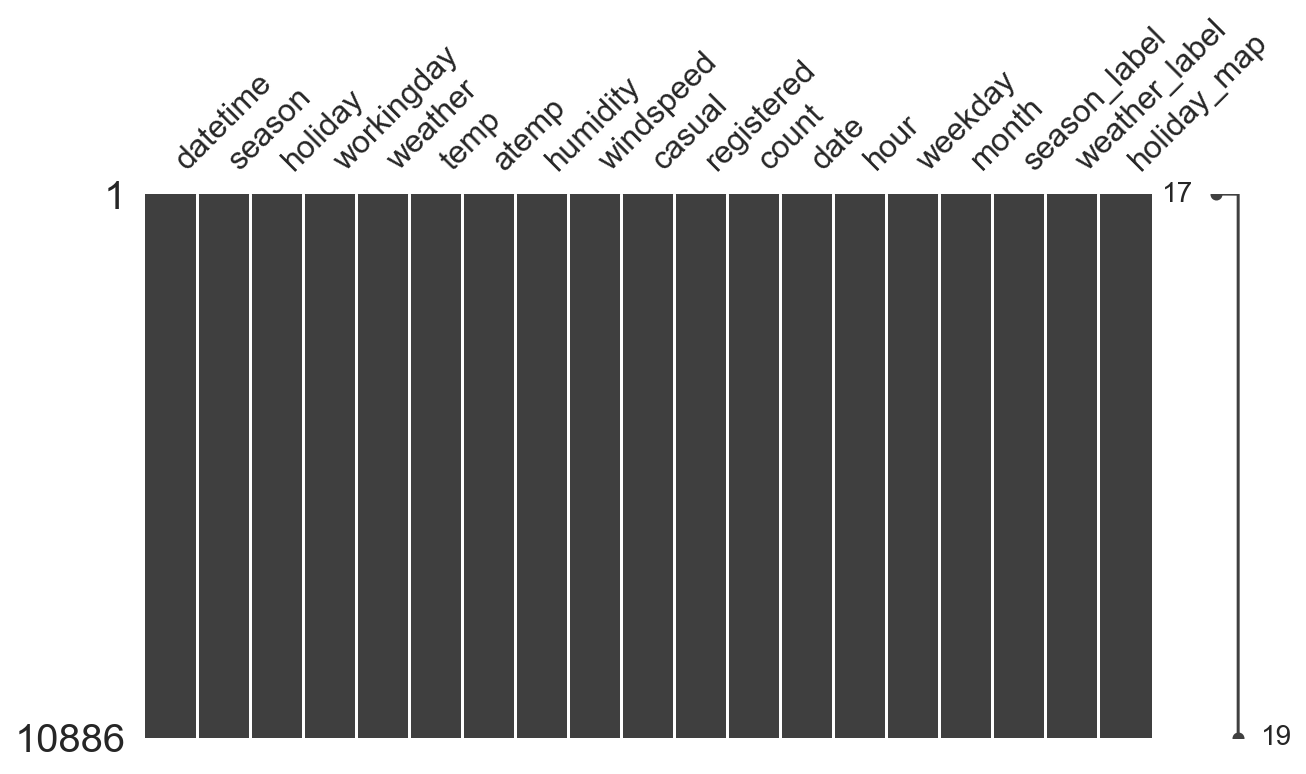

In [9]:
#可视化查询缺失值
msno.matrix(Datas,figsize=(10,5))

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


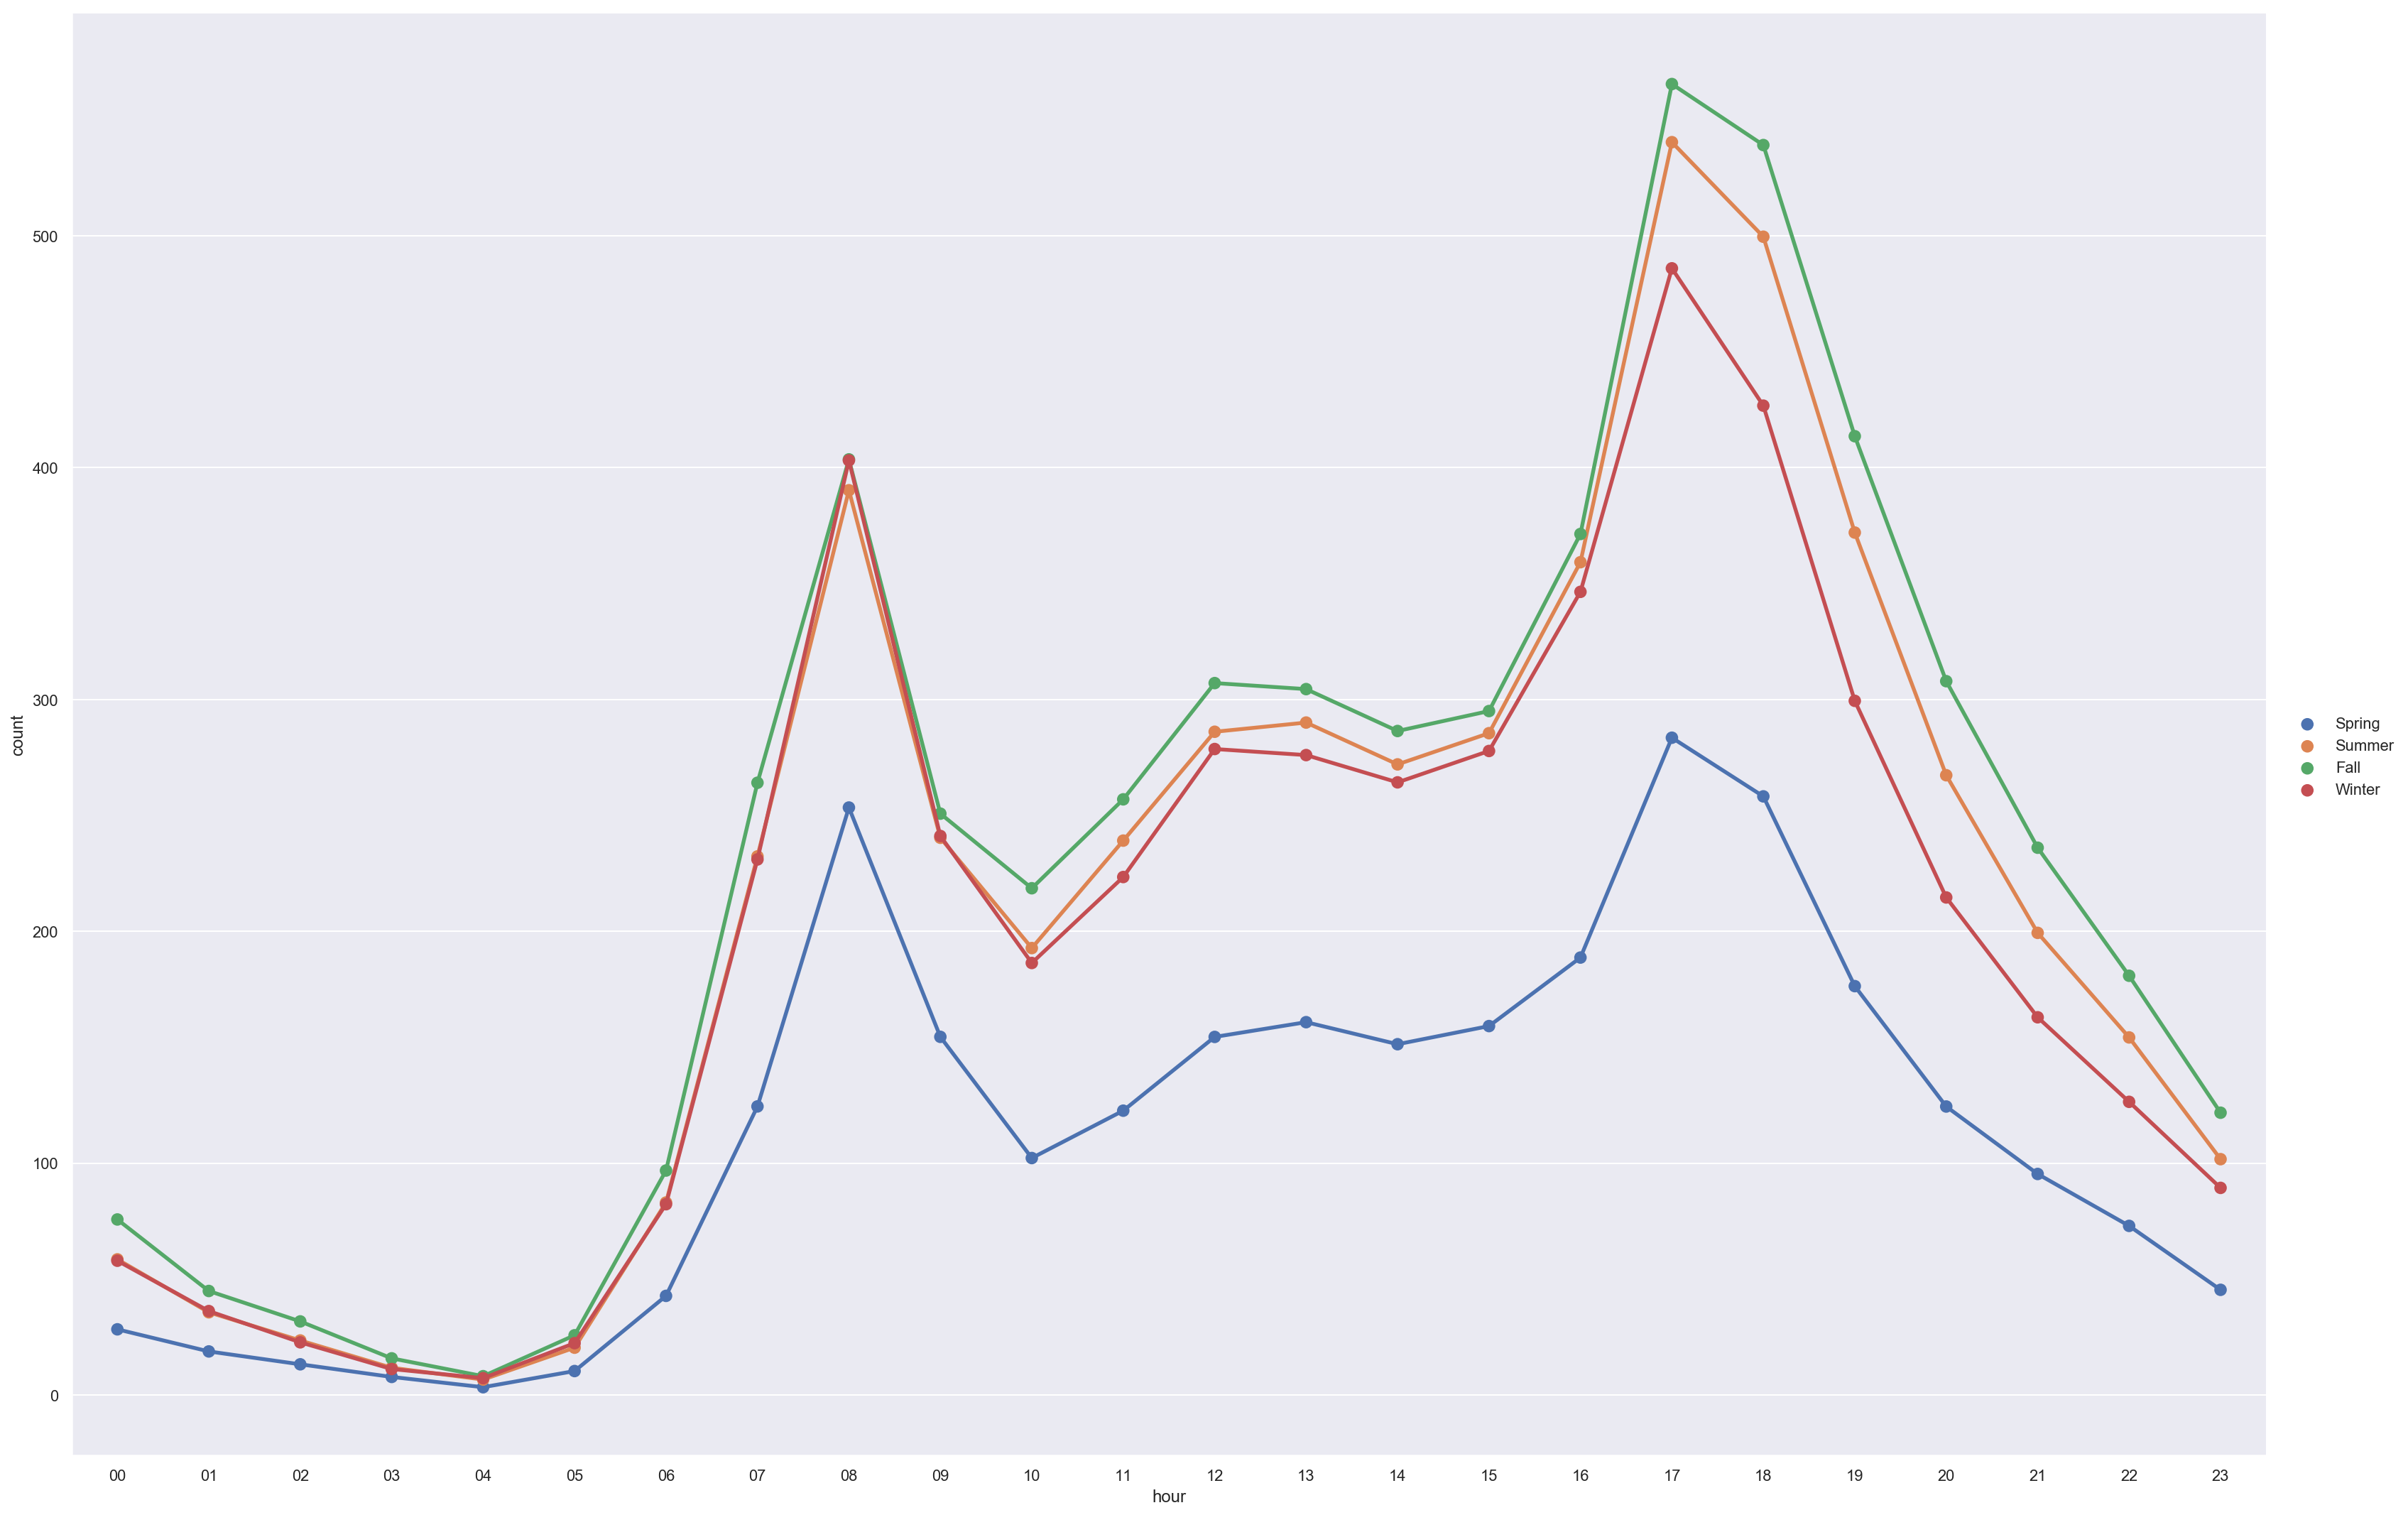

In [10]:
def season_hour():
    """
    func: 判断不同季节情况下24小时内的数据情况
    """
    sns.FacetGrid(
        data=Datas,
        size=15,
        aspect=1.5). map(
        sns.pointplot,
        'hour',
        'count',
        'season_label',
        palette="deep",
        ci=None). add_legend()
    plt.show()

season_hour()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


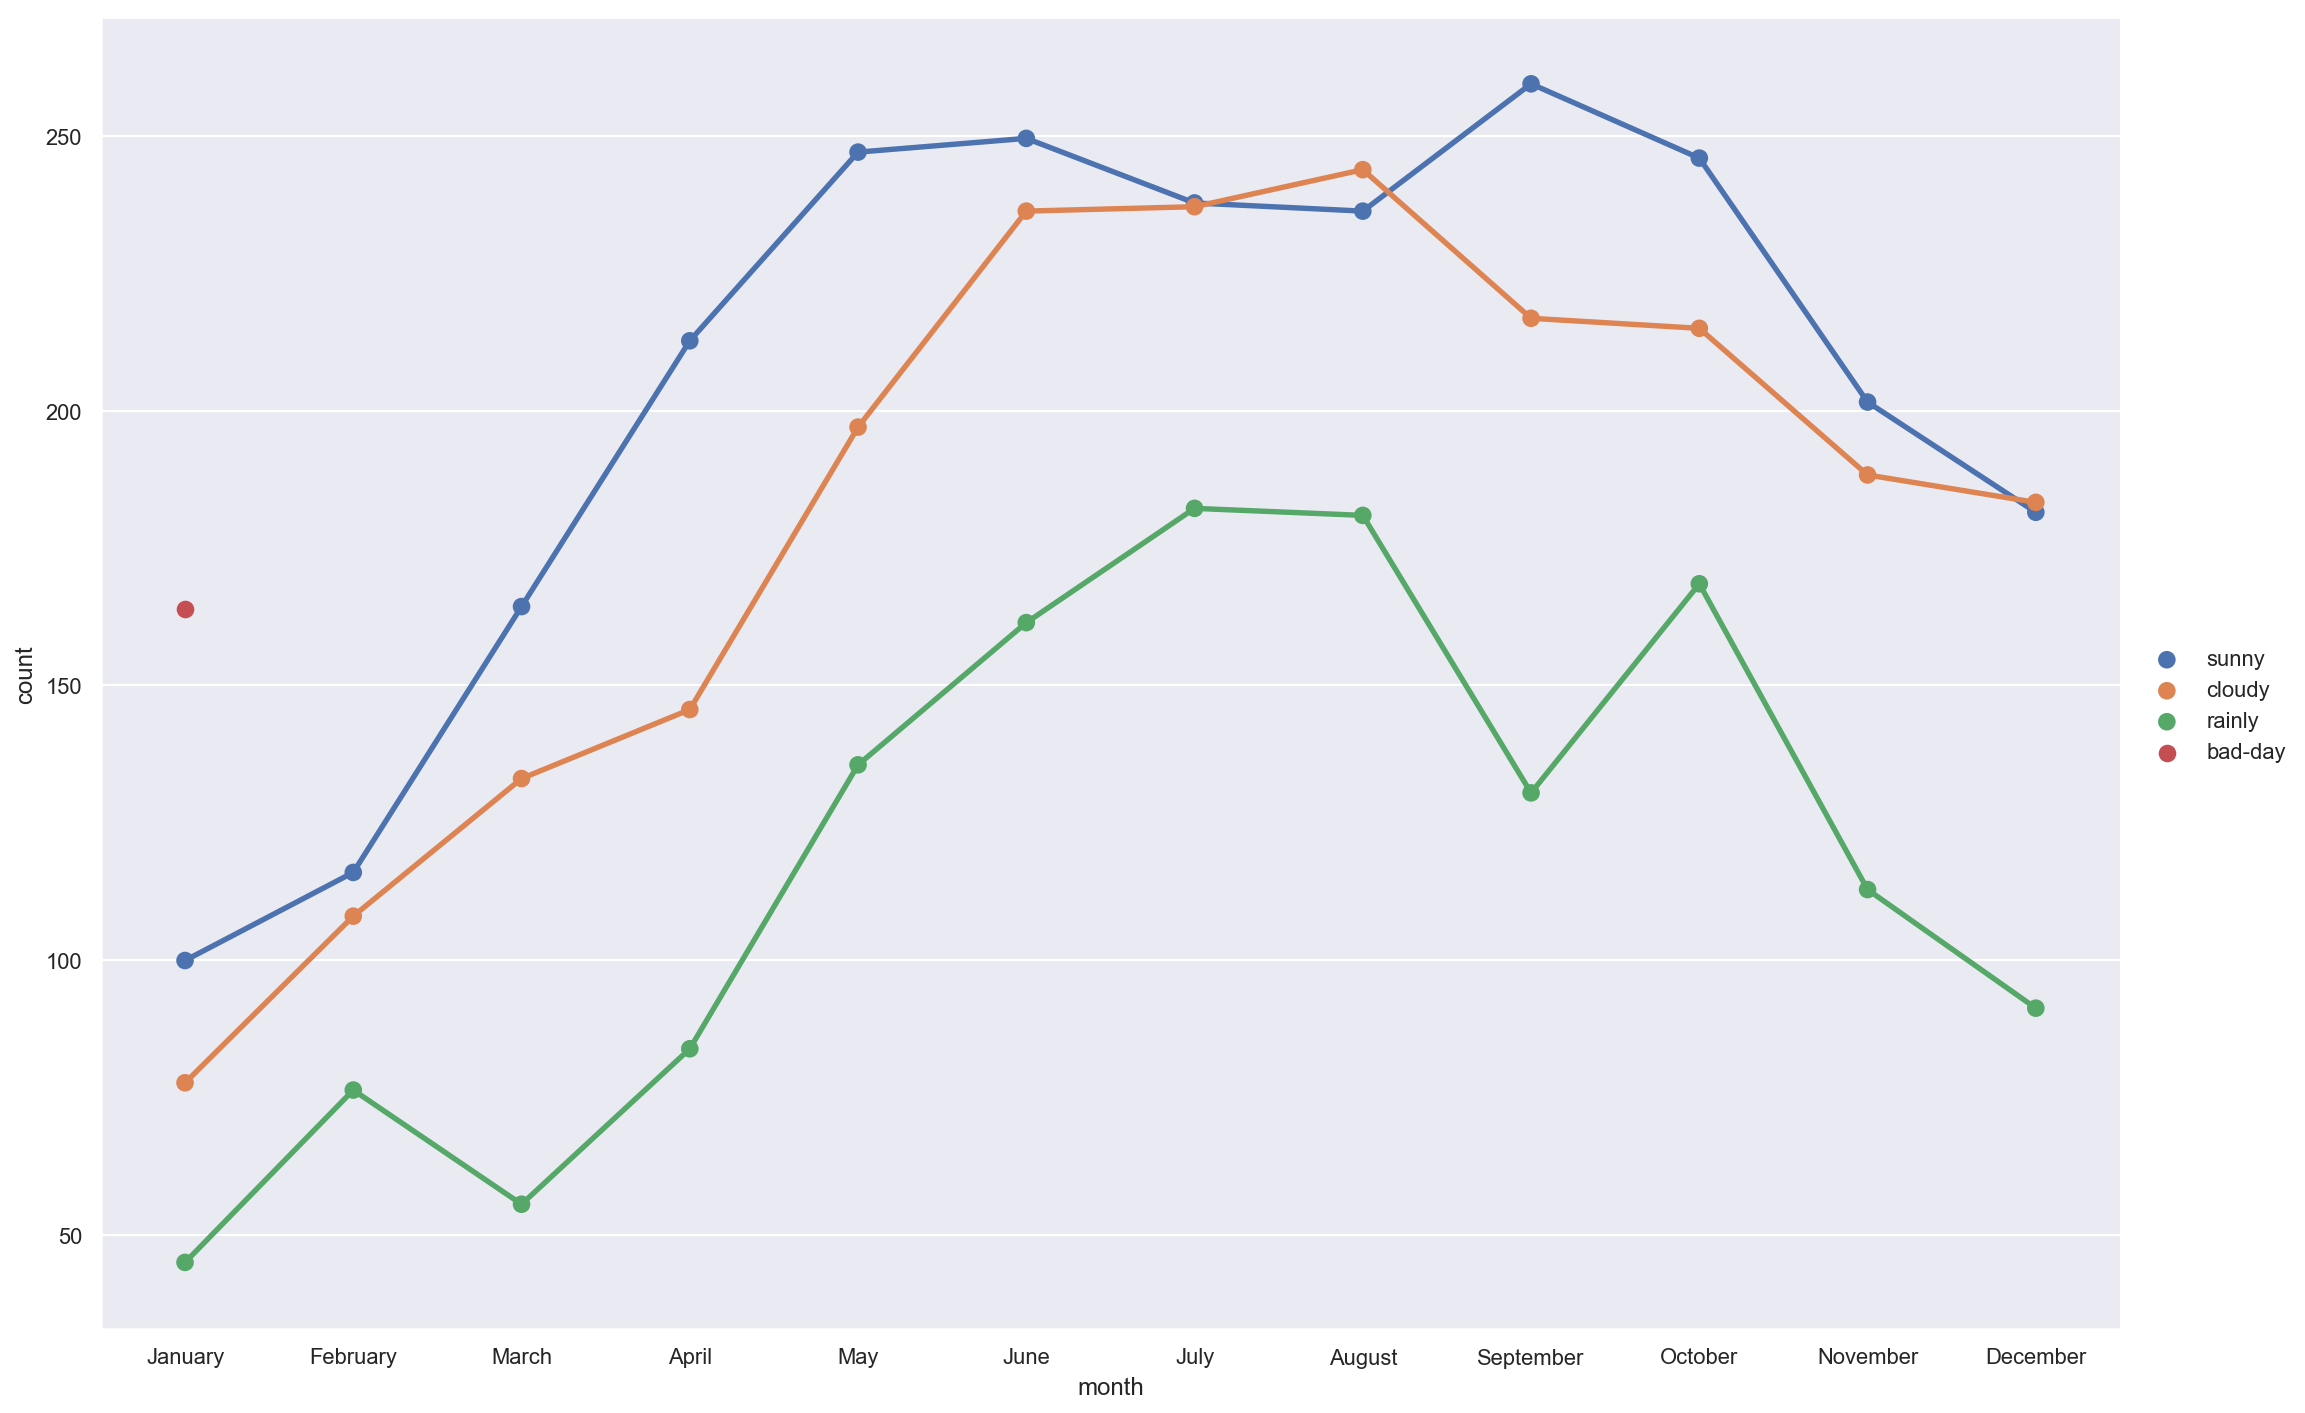

In [19]:
def weather_day():
    """
    func: 判断不同季节情况下每一星期内的数据情况
    """
    sns.FacetGrid(
        data=Datas,
        height=10,
        aspect=1.5). map(
        sns.pointplot,
        'month',
        'count',
        'weather_label',
        palette="deep",
        ci=None). add_legend()
    plt.show()

weather_day()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


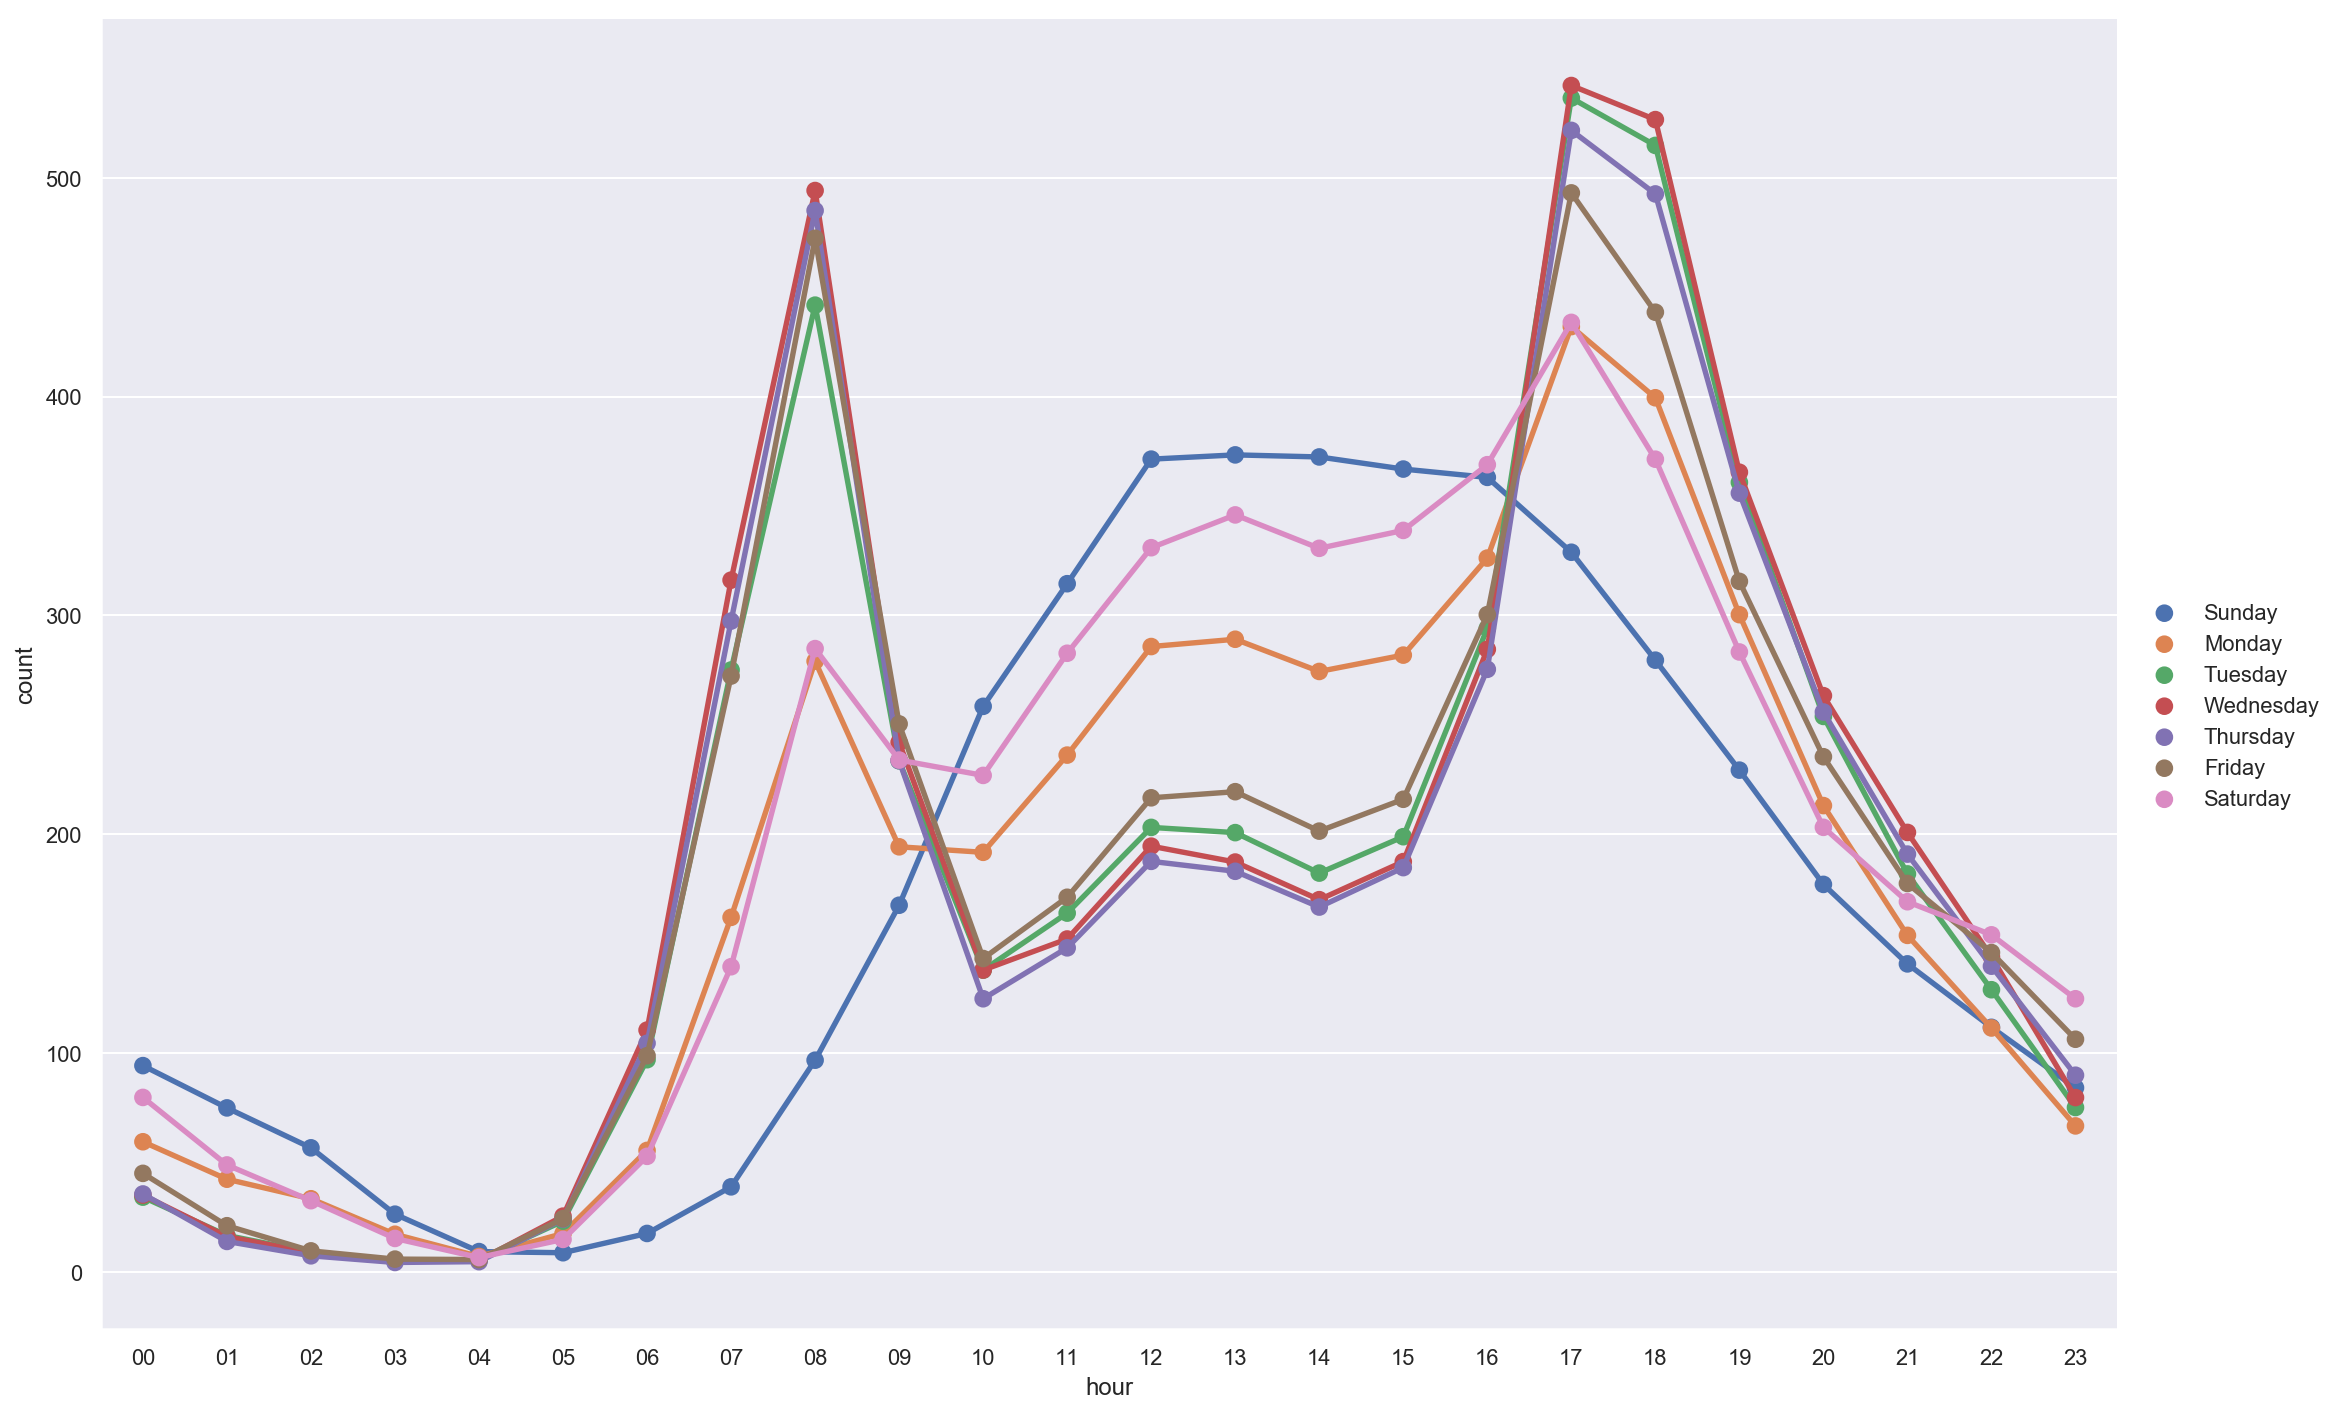

In [20]:
def weekday_hour():
    """
    func: 判断一星期中每天的24小时内的骑行规律
    """
    sns.FacetGrid(
        data=Datas,
        height=10,
        aspect=1.5).map(
        sns.pointplot,
        'hour',
        'count',
        'weekday',
        palette='deep',
        ci=None
    ).add_legend()
    plt.show()


weekday_hour()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


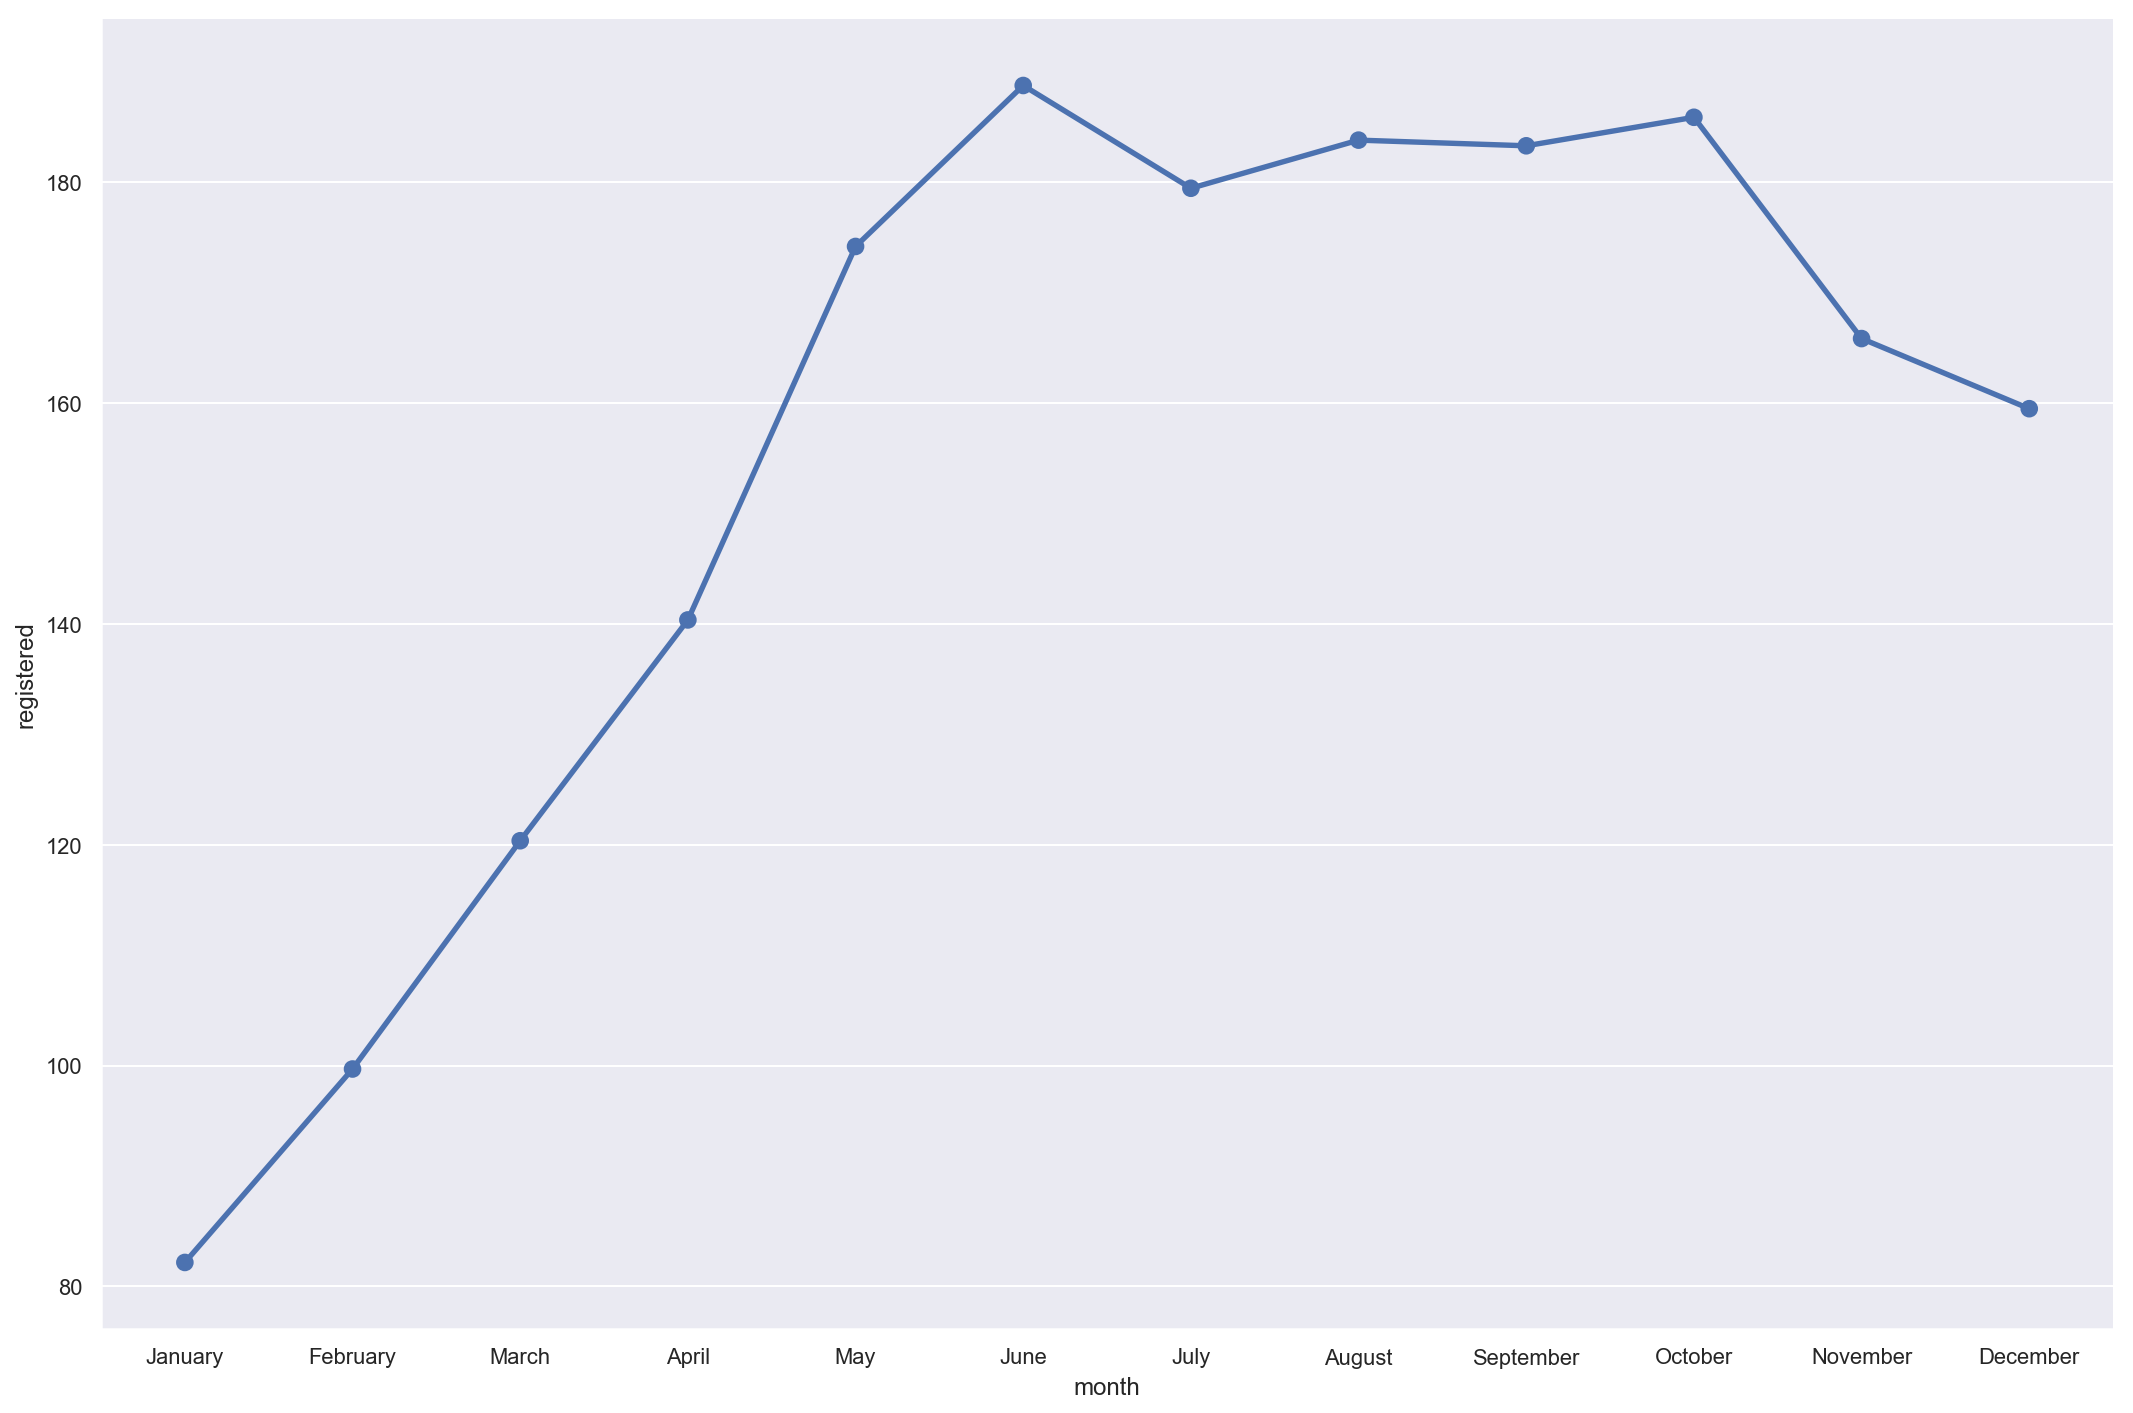

In [21]:
def month_registered():
    """
    func: 判断每个月的注册人数
    """
    sns.FacetGrid(
        data=Datas,
        height=10,
        aspect=1.5).map(
        sns.pointplot,
        'month',
        'registered',
        kind='line',
        ci=None
    )
    plt.show()


month_registered()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


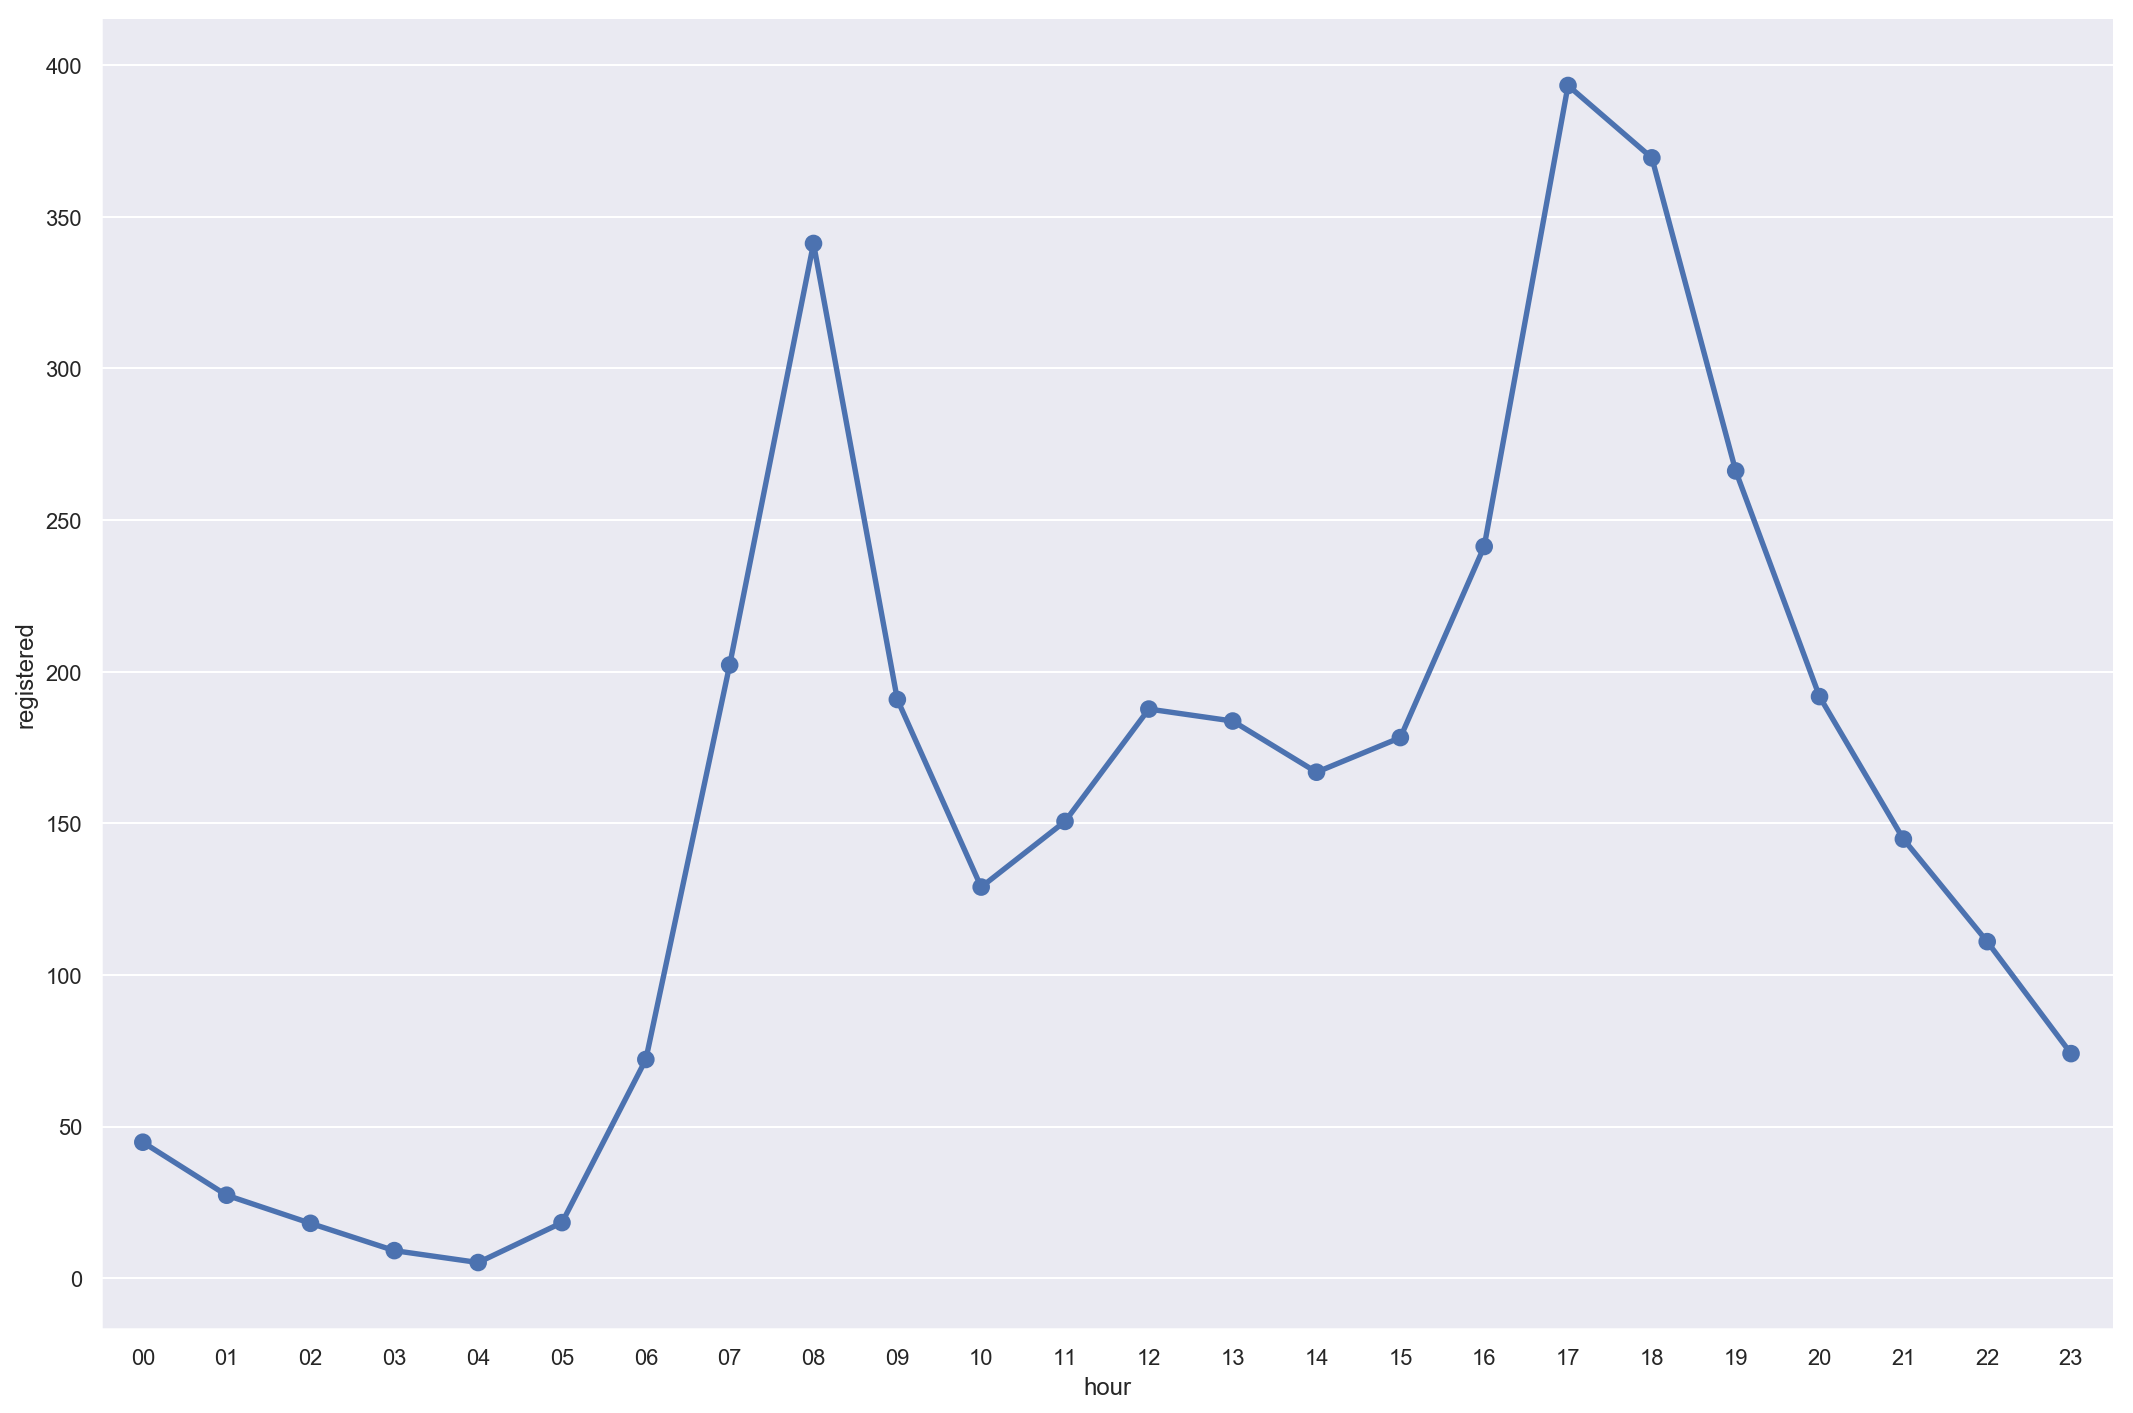

In [22]:
def hour_registered():
    """
    func: 判断24小时内哪一时间段的注册人数多
    """
    sns.FacetGrid(
        data=Datas,
        height=10,
        aspect=1.5).map(
        sns.pointplot,
        'hour',
        'registered',
        kind='line',
        ci=None
    )
    plt.show()


hour_registered()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


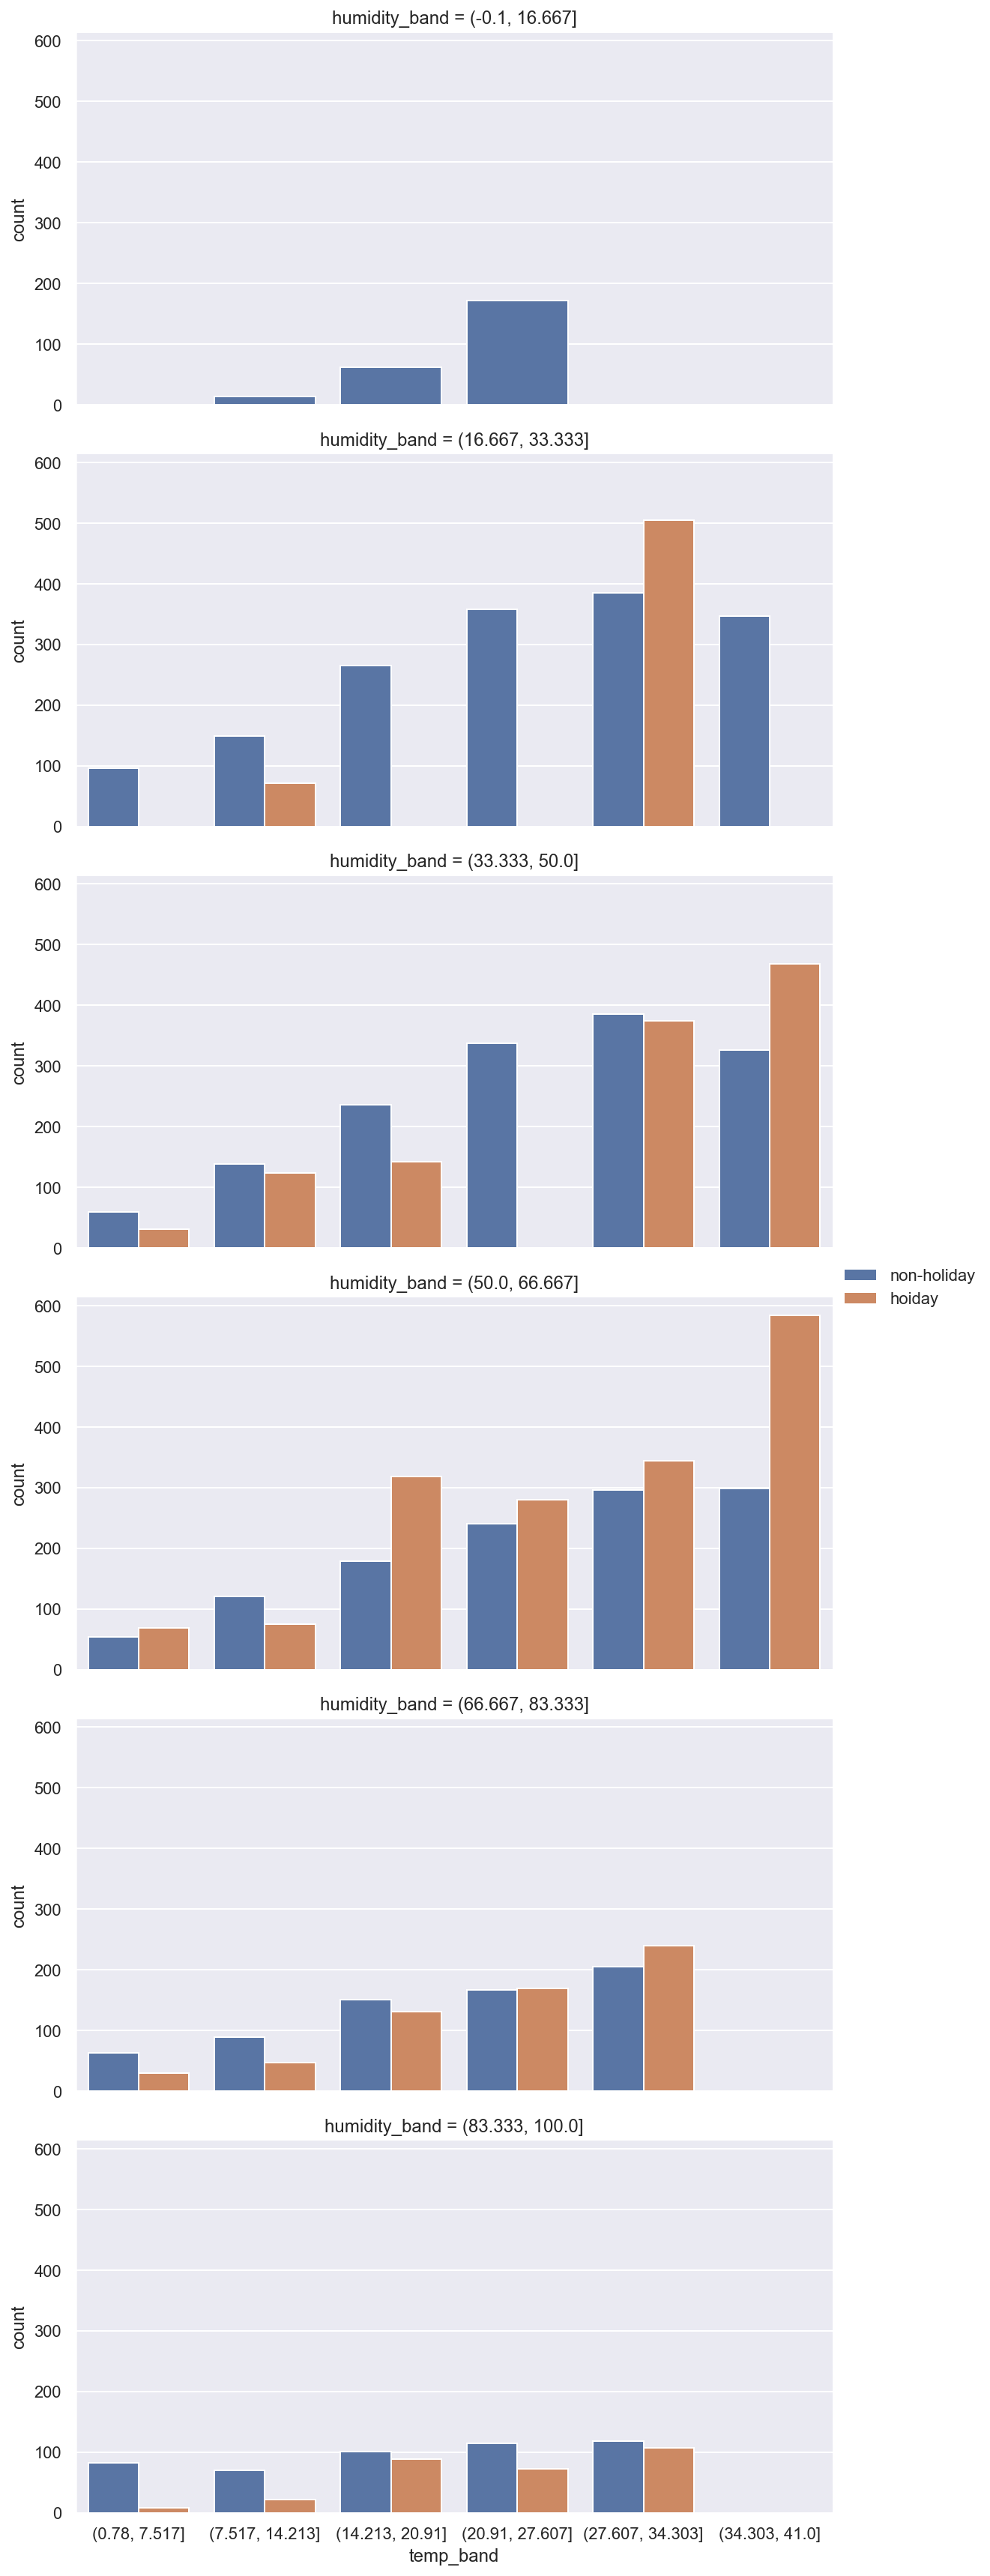

In [28]:
def humidity_temp_count():
    """
    func：
    """
    # 设定温度和湿度离散化
    Datas["humidity_band"] = pd.cut(Datas['humidity'], 6)
    Datas["temp_band"] = pd.cut(Datas["temp"], 6)
    # 对假期字段映射处理
    Datas["holiday_map"] = Datas["holiday"].map(
        {0: "non-holiday", 1: "hoiday"})
    sns.FacetGrid(
        data=Datas,
        row="humidity_band",
        size=4,
        aspect=2). map(
        sns.barplot,
        'temp_band',
        'count',
        'holiday_map',
        palette='deep',
        ci=None).add_legend()
    plt.show()


humidity_temp_count()

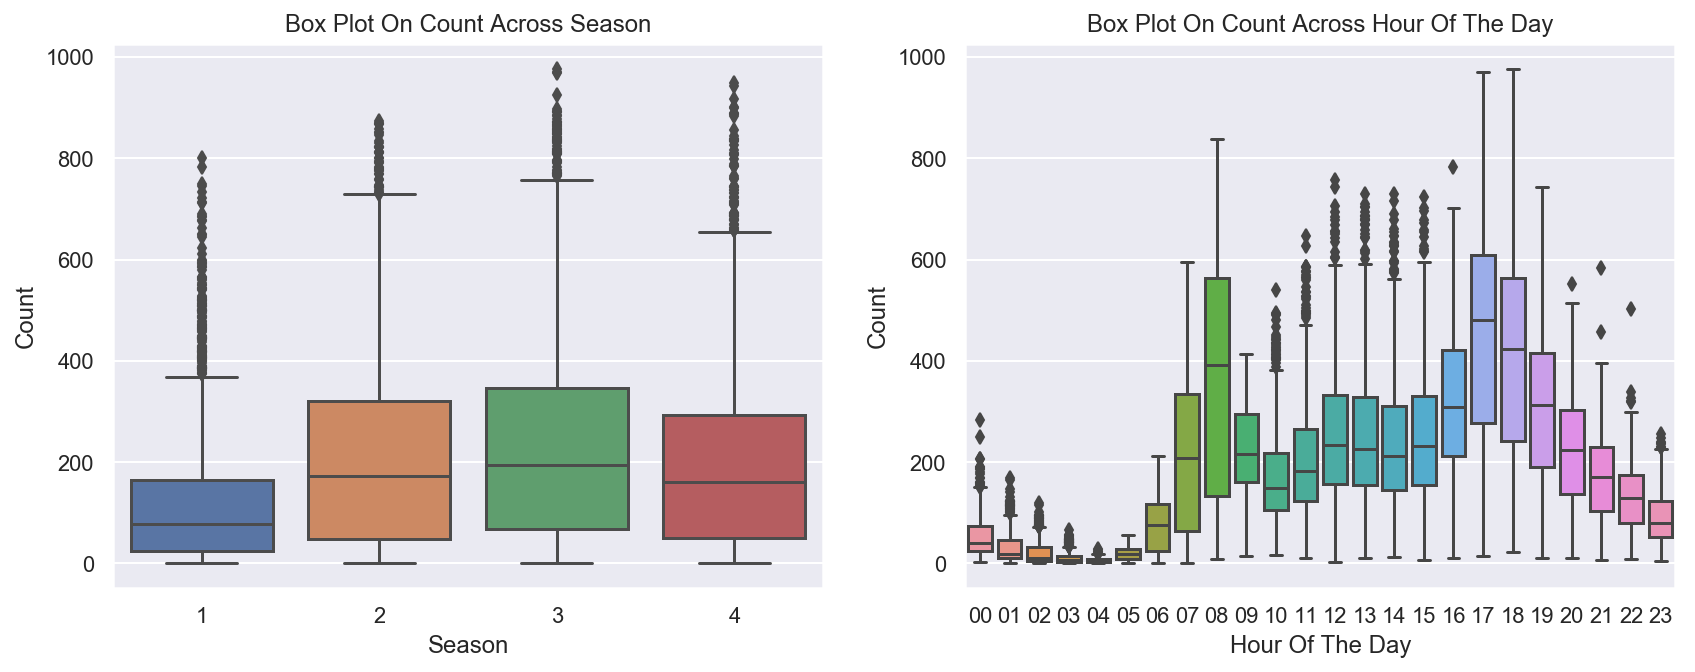

In [29]:
def boxplot_img():
    """
    func:用箱体图分析
    """
    # 设置绘图格式和画布大小
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14, 5)
    # 添加第1个子图，租车人数季节分布的箱线图
    sns.boxplot(data=Datas, y="count", x="season", orient="v", ax=axes[0])
    # 添加第2个子图，租车人数时间分布的箱线图
    sns.boxplot(data=Datas, y="count", x="hour", orient="v", ax=axes[1])
    # 设置图坐标轴和标题
    axes[0].set(xlabel='Season', ylabel='Count', title="Box Plot On Count Across Season")
    axes[1].set(xlabel='Hour Of The Day', ylabel='Count', title="Box Plot On Count Across Hour Of The Day")
    plt.show()

boxplot_img()

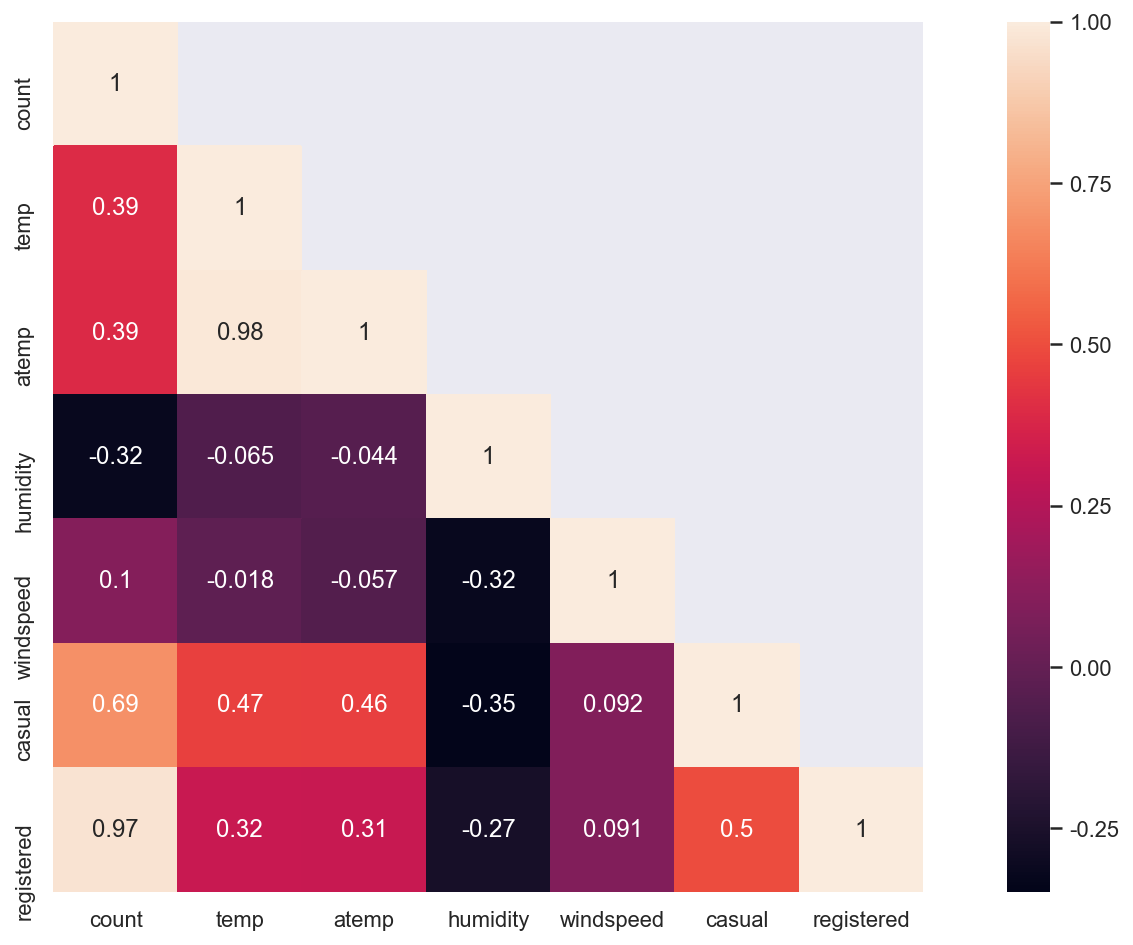

In [30]:
def all_factors():
    """
    func:分析各因素对共享单车使用的影响
    """
    correlation = Datas[["count", "temp", "atemp",  "humidity", "windspeed", "casual", "registered"]].corr()
    mask = np.array(correlation)
    mask[np.tril_indices_from(mask)] = False
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    sns.heatmap(correlation, mask=mask, vmax=1.0, square=True, annot=True)
    plt.show()


all_factors()